/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


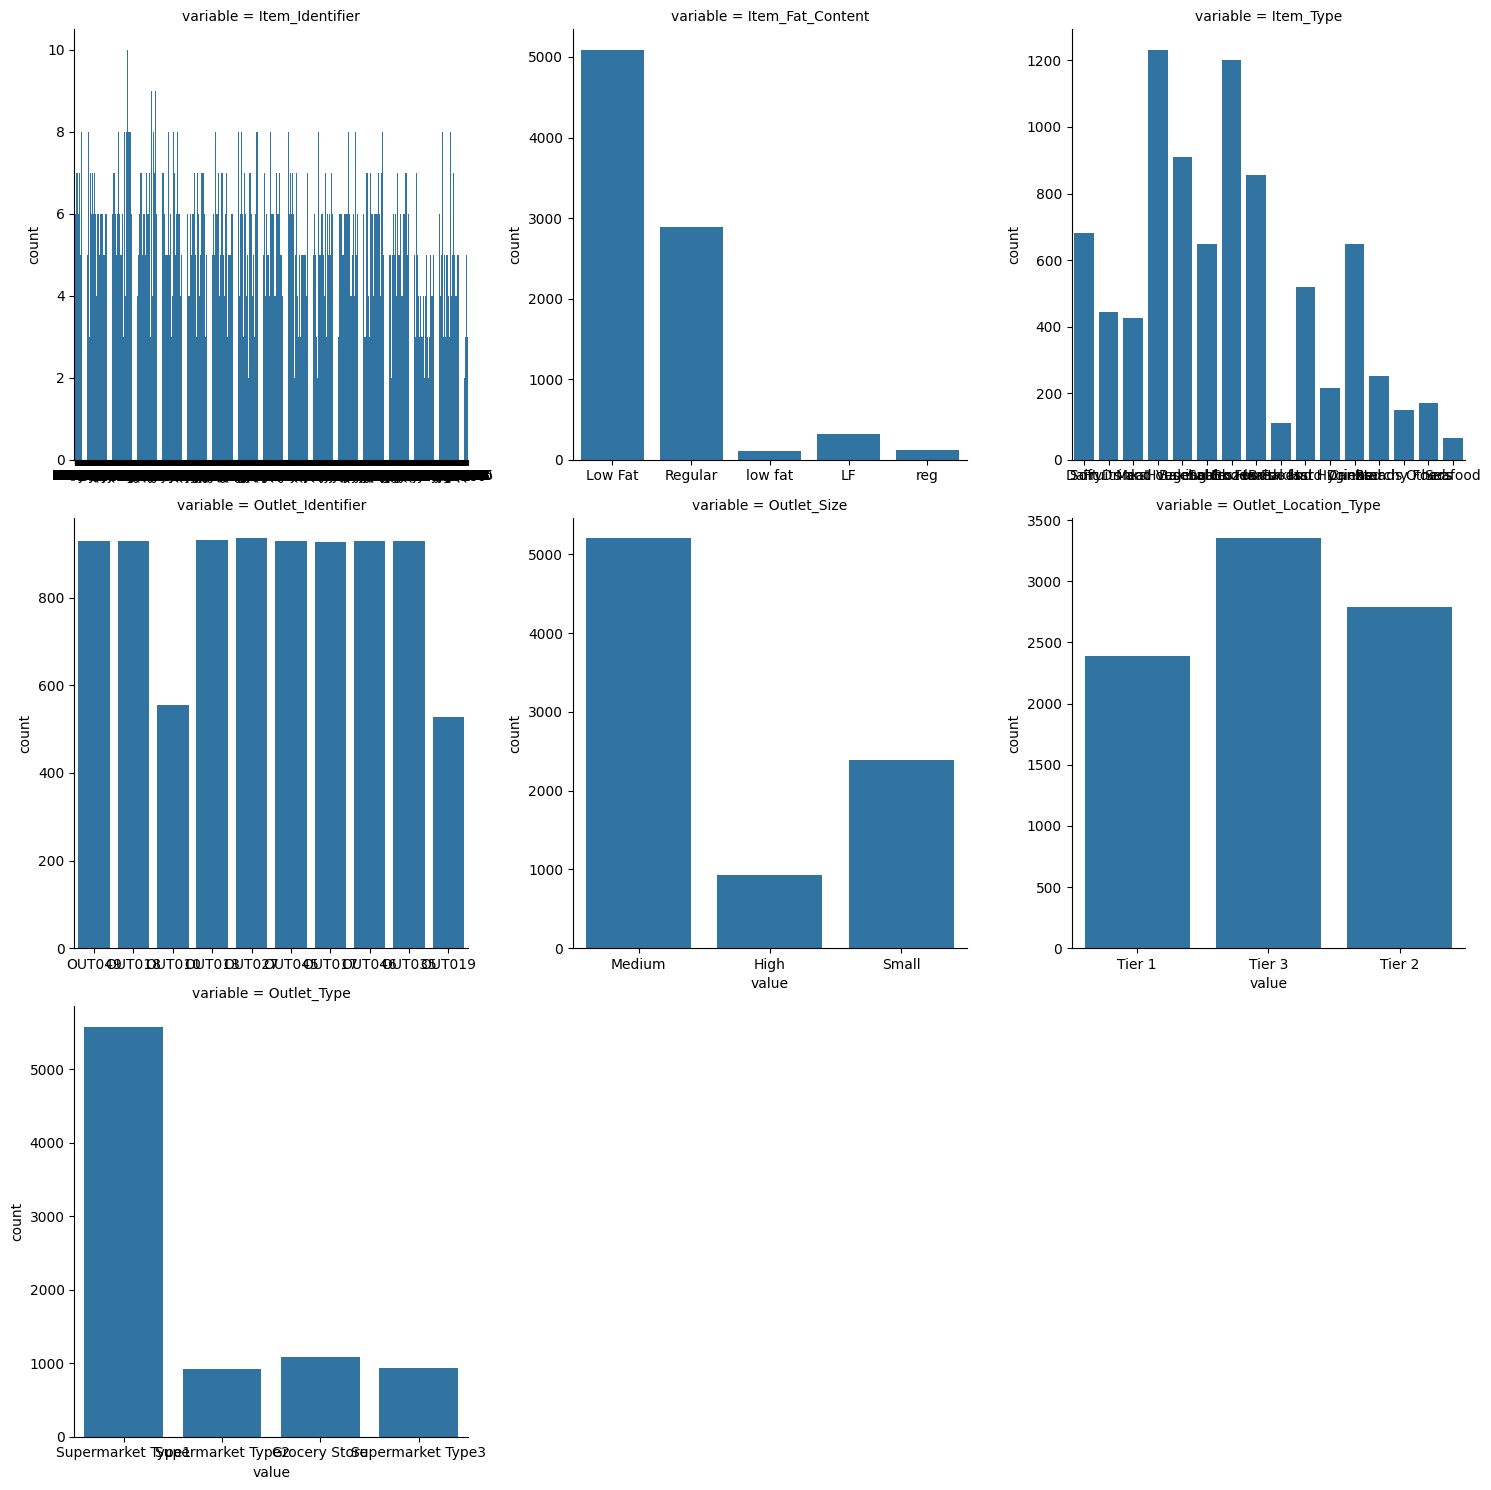

In [ ]:
#Create a countplot
f = pd.melt(df, value_vars=categorical_columns)
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, height = 5)
g = g.map(sns.countplot, "value")

c:\Users\Promantus\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Promantus\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

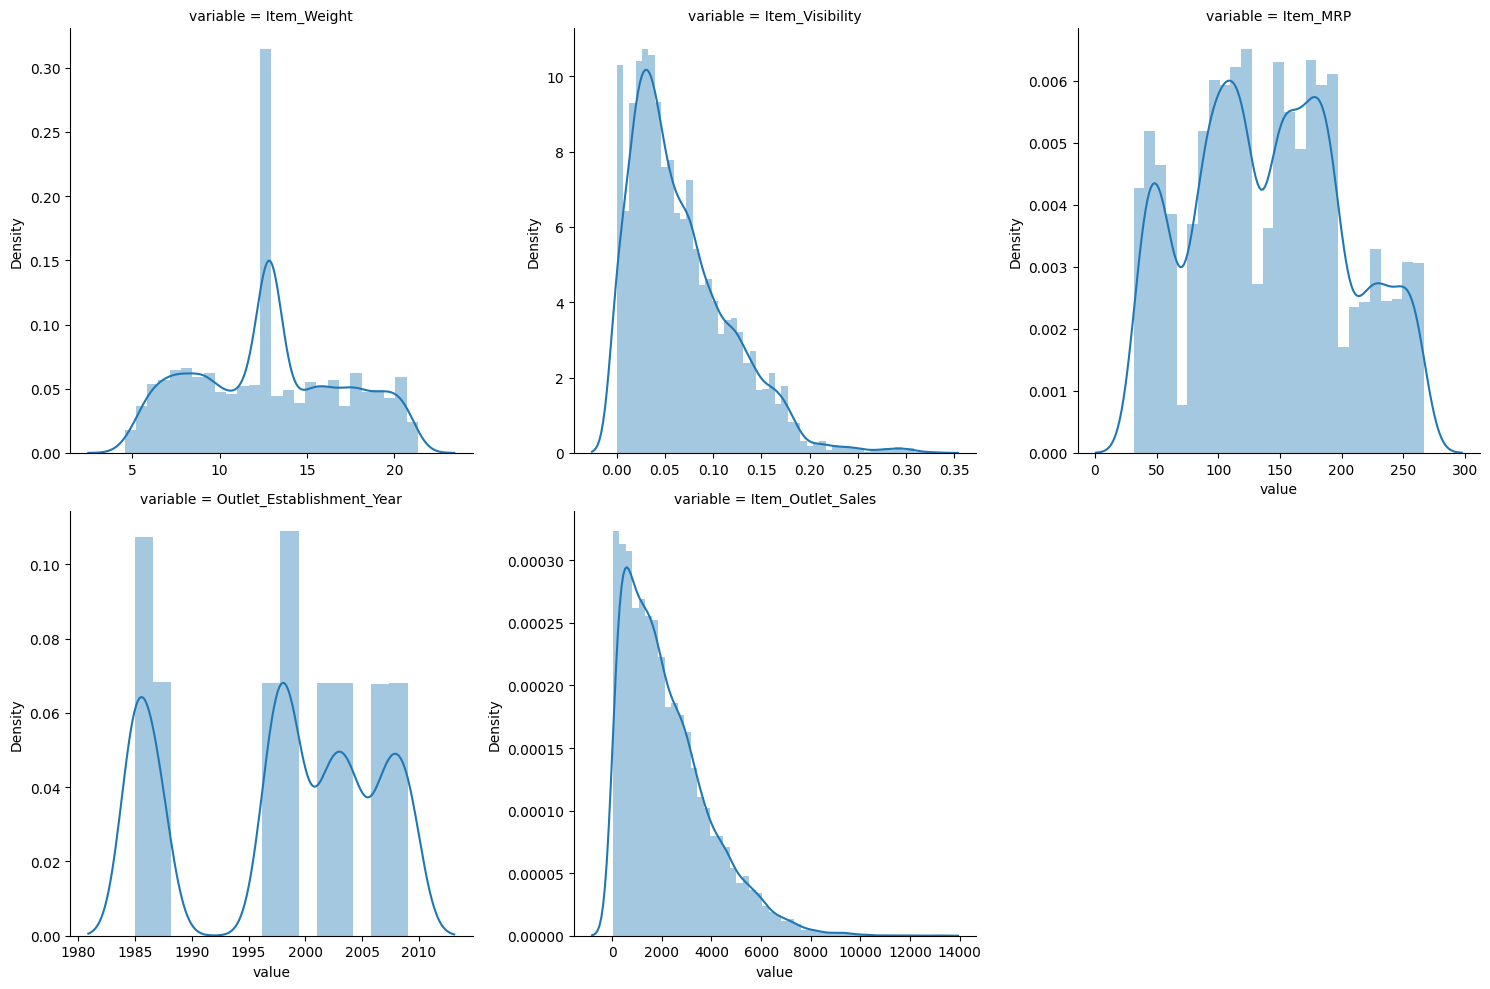

In [ ]:
f = pd.melt(df, value_vars=numeric_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height = 5)
g = g.map(sns.distplot, "value")

<Axes: xlabel='Item_Outlet_Sales'>

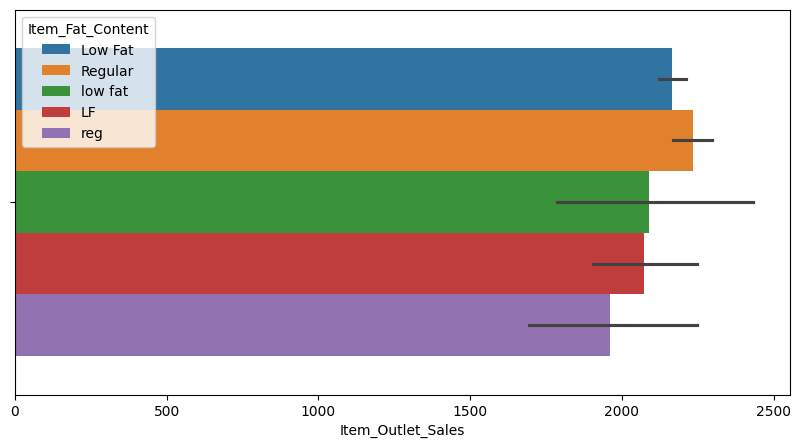

In [ ]:
sns.barplot(x='Item_Outlet_Sales', hue='Item_Fat_Content', data=df)

<Axes: xlabel='Item_Outlet_Sales'>

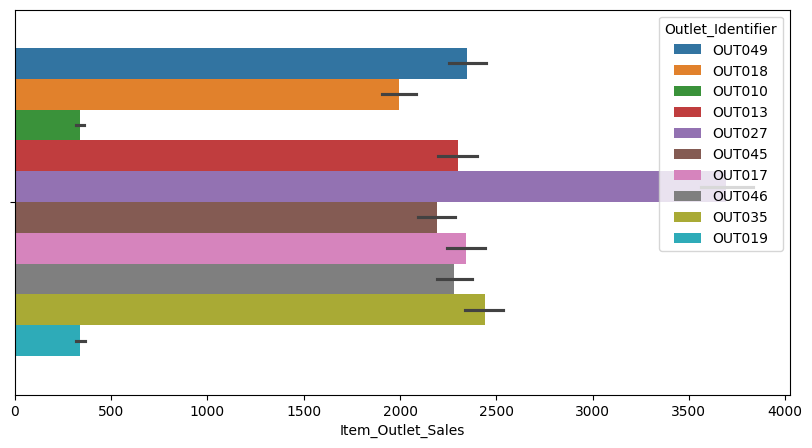

In [ ]:
sns.barplot(x='Item_Outlet_Sales', hue='Outlet_Identifier', data=df)

<Axes: xlabel='Item_Outlet_Sales'>

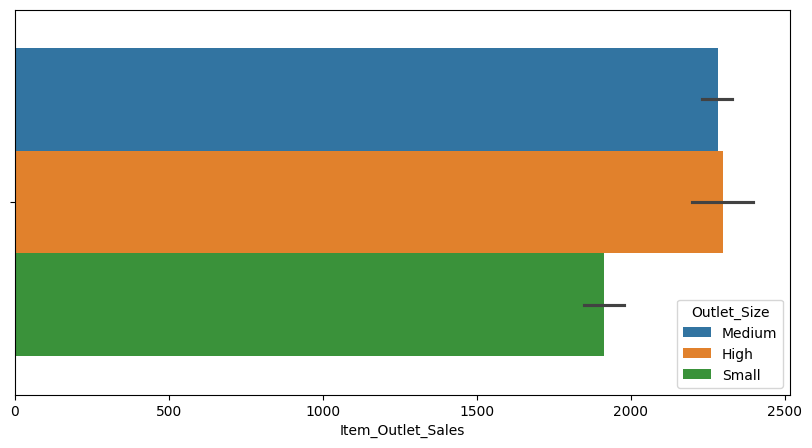

In [ ]:
sns.barplot(x='Item_Outlet_Sales', hue='Outlet_Size', data=df)

<Axes: xlabel='Item_Outlet_Sales'>

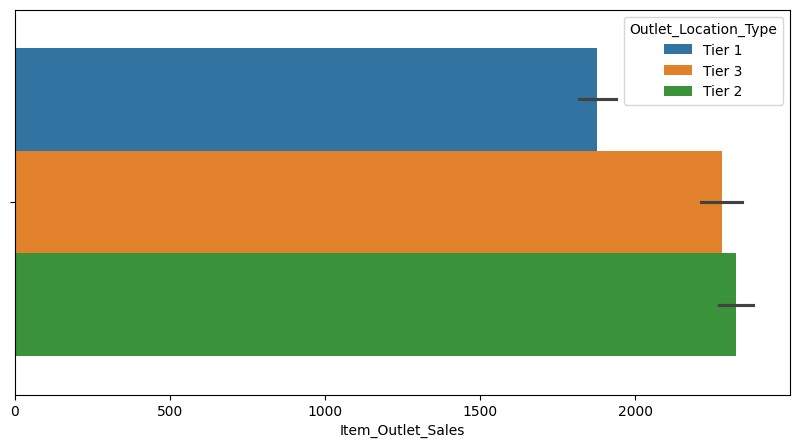

In [ ]:
sns.barplot(x='Item_Outlet_Sales', hue='Outlet_Location_Type', data=df)

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

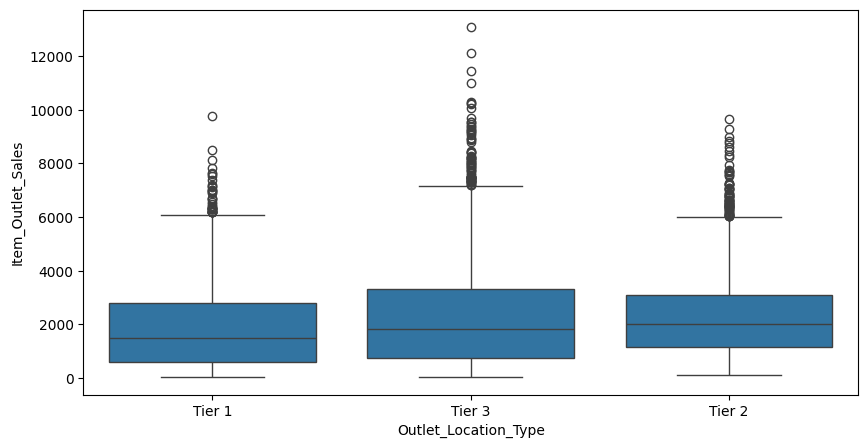

In [ ]:
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

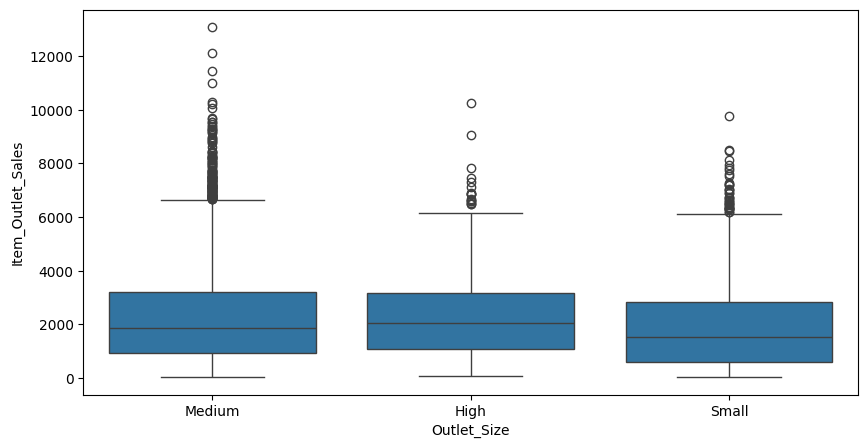

In [ ]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)

<Axes: xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

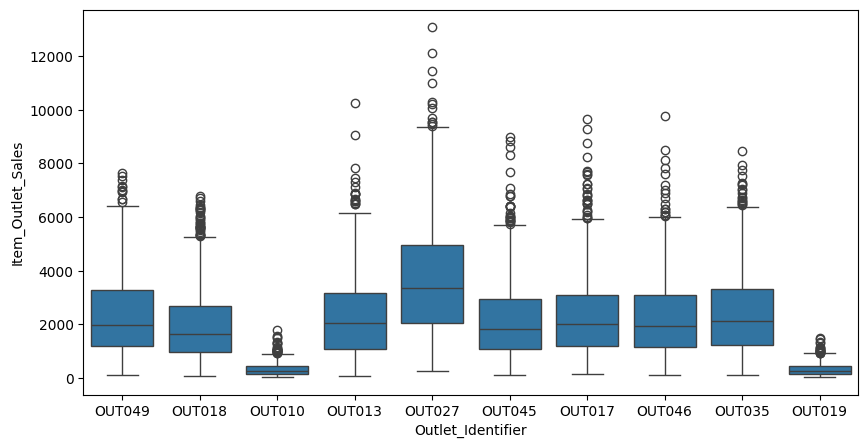

In [ ]:
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df)

<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

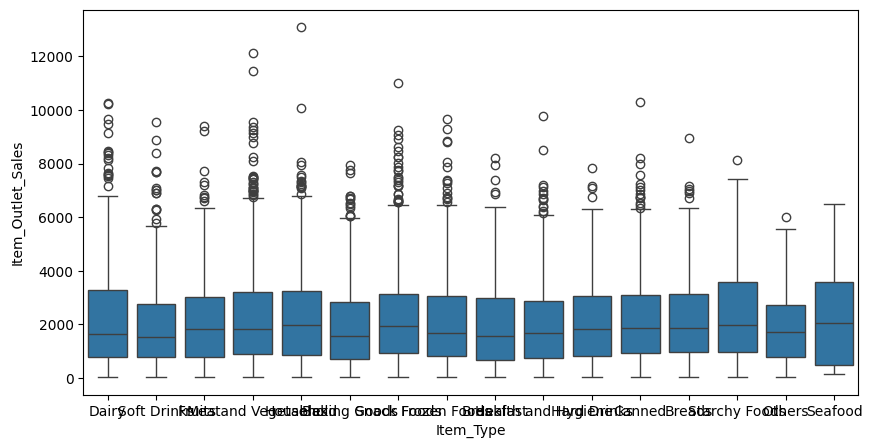

In [ ]:
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

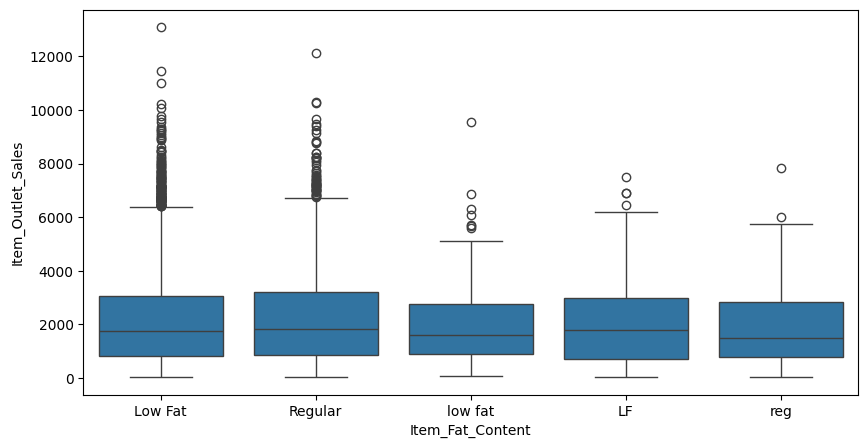

In [ ]:
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)

# Outlier Handling


In [21]:
import pandas as pd
from scipy import stats

In [22]:
z_scores = stats.zscore(df.select_dtypes(include='number'))
df_z_scores = pd.DataFrame(z_scores, columns=df.select_dtypes(include='number').columns)
threshold = 3
outliers = (df_z_scores.abs() > threshold)
print("Outliers:")
df[outliers.any(axis=1)]

Outliers:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,FDS02,12.857645,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
83,NCL18,12.857645,Low Fat,0.293418,Household,194.6136,OUT019,1985,Small,Tier 1,Grocery Store,583.2408
108,DRE60,12.857645,low fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160
130,FDY25,12.857645,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944
145,FDP16,18.600000,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,FDU55,16.200000,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.5062
8273,FDD14,12.857645,LF,0.297313,Canned,185.4266,OUT019,1985,Small,Tier 1,Grocery Store,368.8532
8345,FDY28,12.857645,Regular,0.266397,Frozen Foods,215.6218,OUT019,1985,Small,Tier 1,Grocery Store,641.1654
8432,FDI16,14.000000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,Medium,Tier 3,Grocery Store,159.7920


In [23]:
outliers_mask = outliers.any(axis=1)

df = df[~outliers_mask]

In [24]:
df.shape

(8338, 12)

#  converting categorical data to numerical data

In [25]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    4989
Regular    2817
LF          307
reg         116
low fat     109
Name: count, dtype: int64

In [26]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [27]:
df['Outlet_Size'] =df.Outlet_Size.map({'Small':0,'Medium':1,'High':2})

In [28]:
df['Outlet_Size']

0       1
1       1
2       1
3       1
4       2
       ..
8518    2
8519    1
8520    0
8521    1
8522    0
Name: Outlet_Size, Length: 8338, dtype: int64

In [29]:
mapping_dict = {
    'Dairy': 0,
    'Soft Drinks': 1,
    'Meat': 2,
    'Fruits and Vegetables': 3,
    'Household': 4,
    'Baking Goods': 5,
    'Snack Foods': 6,
    'Frozen Foods': 7,
    'Breakfast': 8,
    'Health and Hygiene': 9,
    'Hard Drinks': 10,
    'Canned': 11,
    'Breads': 12,
    'Starchy Foods': 13,
    'Others': 14,
    'Seafood': 15
}
df['Item_Type'] = df['Item_Type'].map(mapping_dict)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])

In [32]:
print("Classes:", le.classes_)

Classes: ['Low Fat' 'Regular']


In [33]:
print("Assigned Values:", dict(zip(le.classes_, le.transform(le.classes_))))

Assigned Values: {'Low Fat': 0, 'Regular': 1}


In [34]:
df['Item_Fat_Content'].unique()

array([0, 1])

In [35]:
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])

In [36]:
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])

In [37]:
df.drop(columns=['Item_Identifier'], inplace=True)

In [38]:
# Create a manual mapping dictionary
manual_mapping_dict = {
    'OUT049': 0,
    'OUT018': 1,
    'OUT010': 2,
    'OUT013': 3,
    'OUT027': 4,
    'OUT045': 5,
    'OUT017': 6,
    'OUT046': 7,
    'OUT035': 8,
    'OUT019': 9
}


In [39]:
df['Outlet_Identifier'] = df['Outlet_Identifier'].map(manual_mapping_dict)

<ipython-input-40-2b4281cff148>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(df['Item_Outlet_Sales']))


0.11227456935059096

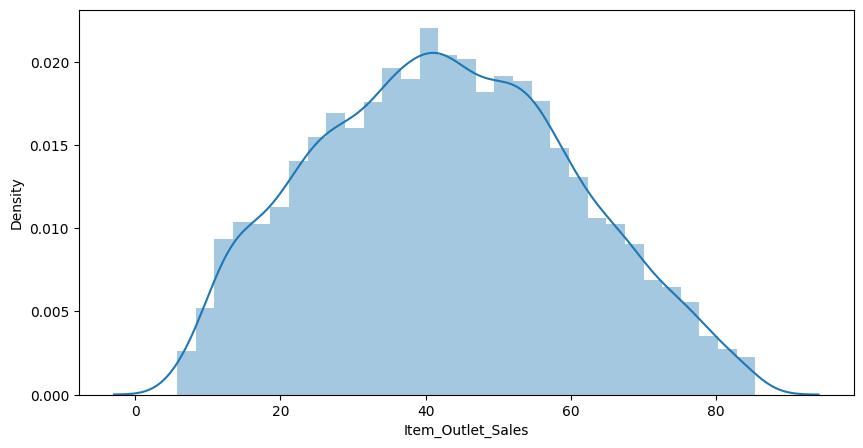

In [40]:
sns.distplot(np.sqrt(df['Item_Outlet_Sales']))
np.sqrt(df['Item_Outlet_Sales']).skew()

In [41]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,0,249.8092,0,1999,1,0,1,3735.1380
1,5.920,1,0.019278,1,48.2692,1,2009,1,2,2,443.4228
2,17.500,0,0.016760,2,141.6180,0,1999,1,0,1,2097.2700
3,19.200,1,0.000000,3,182.0950,2,1998,1,2,0,732.3800
4,8.930,0,0.000000,4,53.8614,3,1987,2,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,6,214.5218,3,1987,2,2,1,2778.3834
8519,8.380,1,0.046982,5,108.1570,5,2002,1,1,1,549.2850
8520,10.600,0,0.035186,9,85.1224,8,2004,0,1,1,1193.1136
8521,7.210,1,0.145221,6,103.1332,1,2009,1,2,2,1845.5976


In [ ]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,0,249.8092,0,1999,1,0,1,3735.1380
1,5.920,1,0.019278,1,48.2692,1,2009,1,2,2,443.4228
2,17.500,0,0.016760,2,141.6180,0,1999,1,0,1,2097.2700
3,19.200,1,0.000000,3,182.0950,2,1998,1,2,0,732.3800
4,8.930,0,0.000000,4,53.8614,3,1987,2,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,6,214.5218,3,1987,2,2,1,2778.3834
8519,8.380,1,0.046982,5,108.1570,5,2002,1,1,1,549.2850
8520,10.600,0,0.035186,9,85.1224,8,2004,0,1,1,1193.1136
8521,7.210,1,0.145221,6,103.1332,1,2009,1,2,2,1845.5976


# Training And Testing

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df.drop(columns=['Item_Outlet_Sales','Outlet_Identifier'])
output=np.cbrt(df['Item_Outlet_Sales'])
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, output, test_size=0.2, random_state=42)


In [44]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,0,249.8092,1999,1,0,1
1,5.920,1,0.019278,1,48.2692,2009,1,2,2
2,17.500,0,0.016760,2,141.6180,1999,1,0,1
3,19.200,1,0.000000,3,182.0950,1998,1,2,0
4,8.930,0,0.000000,4,53.8614,1987,2,2,1
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,6,214.5218,1987,2,2,1
8519,8.380,1,0.046982,5,108.1570,2002,1,1,1
8520,10.600,0,0.035186,9,85.1224,2004,0,1,1
8521,7.210,1,0.145221,6,103.1332,2009,1,2,2


In [ ]:
len(X_train)

6670

# Hyperparameter Tuning

In [45]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}

# Hyperparameter optimization using RandomizedSearchCV

In [46]:

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [77]:
model = xgboost.XGBRegressor()

In [48]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [49]:
from sklearn.metrics import mean_squared_error,make_scorer
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

In [50]:
from datetime import datetime
start_time = timer(None)
random_search.fit(X_train,y_train)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 9.06 seconds.


In [51]:
random_search

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='neg_mean_squared_error', verbose=3)

In [52]:
means = random_search.cv_results_['mean_test_score']
params = random_search.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
    if mean == min(means):
        print('Best parameters with the minimum Mean Square Error are:',param)

-4.684297 with: {'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.3}
Best parameters with the minimum Mean Square Error are: {'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.3}
-3.837387 with: {'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.7}
-4.446442 with: {'min_child_weight': 3, 'max_depth': 12, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.4}
-4.540147 with: {'min_child_weight': 5, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.7}
-4.363044 with: {'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 0.7}


In [53]:
random_search

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='neg_mean_squared_error', verbose=3)

In [54]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [78]:
model = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.6, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.4, max_delta_step=0, max_depth=15,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [79]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.6, gpu_id=-1,
             grow_policy=None, importance_type='gain',
             interaction_constraints='', learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
             max_depth=15, max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints='()', multi_strategy=None, n_estimators=100,
             n_jobs=0, num_parallel_tree=1, ...)

In [81]:
from sklearn.metrics import mean_squared_error

In [80]:
ms = mean_squared_error(y_train, model.predict(X_train))
print("Training Set mean_squared_error: %.4f" % ms)

Training Set mean_squared_error: 0.1611


In [82]:
ms = mean_squared_error(y_test, model.predict(X_test))
print("Test Set mean_squared_error: %.4f" % ms)

Test Set mean_squared_error: 4.9259


# save the model

In [61]:
import pickle

# load the model and Test it

In [84]:
data = {
    'Item_Weight': [9.3],
    'Item_Fat_Content': [0],
    'Item_Visibility': [0.016047],
    'Item_Type': [0],
    'Item_MRP': [249.8092],
    'Outlet_Establishment_Year': [1999],
    'Outlet_Size': [0],
    'Outlet_Location_Type': [0],
    'Outlet_Type': [1]
}

# Create a DataFrame
features = pd.DataFrame(data)

# Make the prediction
prediction = model.predict(features)**3

# Print the predicted sales
print(f'Predicted Sales: {prediction[0]}')

Predicted Sales: 3742.2265625


In [83]:
with open('XG_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [63]:
from sklearn.ensemble import RandomForestRegressor
# Define model and parameters
model = RandomForestRegressor()
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=10, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=3)

start_time = timer(None)
random_search.fit(X_train, y_train)
timer(start_time)

print("Best parameters:", random_search.best_params_)

# Model Evaluation
best_model = random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("Training Set mean_squared_error: %.4f" % mean_squared_error(y_train, y_train_pred))
print("Test Set mean_squared_error: %.4f" % mean_squared_error(y_test, y_test_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Time taken: 0 hours 2 minutes and 44.31 seconds.
Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Training Set mean_squared_error: 1.9593
Test Set mean_squared_error: 3.7745


In [64]:
import lightgbm as lgb
model = lgb.LGBMRegressor()
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [31, 63, 127],
    'max_depth': [-1, 10, 20, 30],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Hyperparameter optimization
random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=10, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=3)
start_time = datetime.now()
random_search.fit(X_train, y_train)
print(f"Time taken: {datetime.now() - start_time}")

print("Best parameters:", random_search.best_params_)

# Model Evaluation
best_model = random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("Training Set mean_squared_error: %.4f" % mean_squared_error(y_train, y_train_pred))
print("Test Set mean_squared_error: %.4f" % mean_squared_error(y_test, y_test_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 772
[LightGBM] [Info] Number of data points in the train set: 6670, number of used features: 9
[LightGBM] [Info] Start training from score 11.972316
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Time taken: 0:00:28.856773
Best parameters: {'subsample': 0.6, 'num_leaves': 31, 'n_estimators': 100, 'min_child_samples': 50, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
[LightGB

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
start_time = datetime.now()
model.fit(X_train, y_train)
print(f"Time taken to fit the model: {datetime.now() - start_time}")

# Model Evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Training Set mean_squared_error: %.4f" % mean_squared_error(y_train, y_train_pred))
print("Test Set mean_squared_error: %.4f" % mean_squared_error(y_test, y_test_pred))


Time taken to fit the model: 0:00:00.040704
Training Set mean_squared_error: 5.2652
Test Set mean_squared_error: 5.3886


In [66]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
start_time = datetime.now()
model.fit(X_train, y_train)
print(f"Time taken to fit the model: {datetime.now() - start_time}")

# Model Evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Training Set mean_squared_error: %.4f" % mean_squared_error(y_train, y_train_pred))
print("Test Set mean_squared_error: %.4f" % mean_squared_error(y_test, y_test_pred))

Time taken to fit the model: 0:00:00.050582
Training Set mean_squared_error: 0.0000
Test Set mean_squared_error: 8.0390


In [67]:
data = {
    'Item_Weight': [9.3],
    'Item_Fat_Content': [0],
    'Item_Visibility': [0.016047],
    'Item_Type': [0],
    'Item_MRP': [249.8092],
    'Outlet_Establishment_Year': [1999],
    'Outlet_Size': [0],
    'Outlet_Location_Type': [0],
    'Outlet_Type': [1]
}

# Create a DataFrame
features = pd.DataFrame(data)

# Make the prediction
prediction = model.predict(features)**3

# Print the predicted sales
print(f'Predicted Sales: {prediction[0]}')

Predicted Sales: 3735.1379999999995


In [68]:
with open('DT_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [70]:
data = {
    'Item_Weight': [9.3],
    'Item_Fat_Content': [0],
    'Item_Visibility': [0.016047],
    'Item_Type': [0],
    'Item_MRP': [249.8092],
    'Outlet_Establishment_Year': [1999],
    'Outlet_Size': [0],
    'Outlet_Location_Type': [0],
    'Outlet_Type': [1]
}

# Create a DataFrame
features = pd.DataFrame(data)
with open('DT_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
predictions = loaded_model.predict(features)**3


# Print the predicted sales
print(f'Predicted Sales: {predictions[0]}')

Predicted Sales: 3735.1379999999995


Training Performance Metrics:
Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
R-squared (R²): 1.0000
Test Performance Metrics:
Mean Absolute Error (MAE): 2.2092
Mean Squared Error (MSE): 8.0390
Root Mean Squared Error (RMSE): 2.8353
R-squared (R²): 0.3270


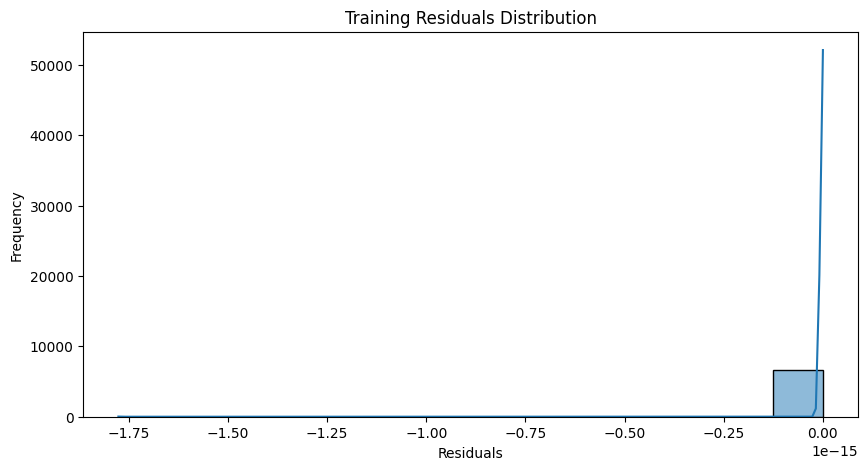

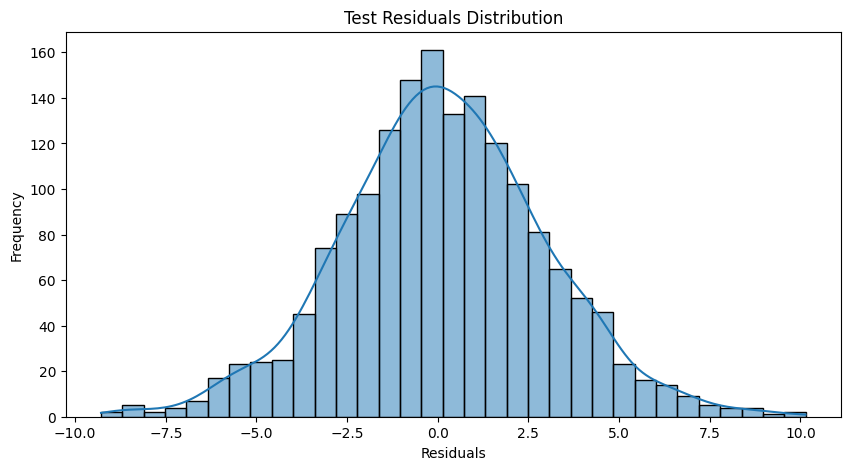

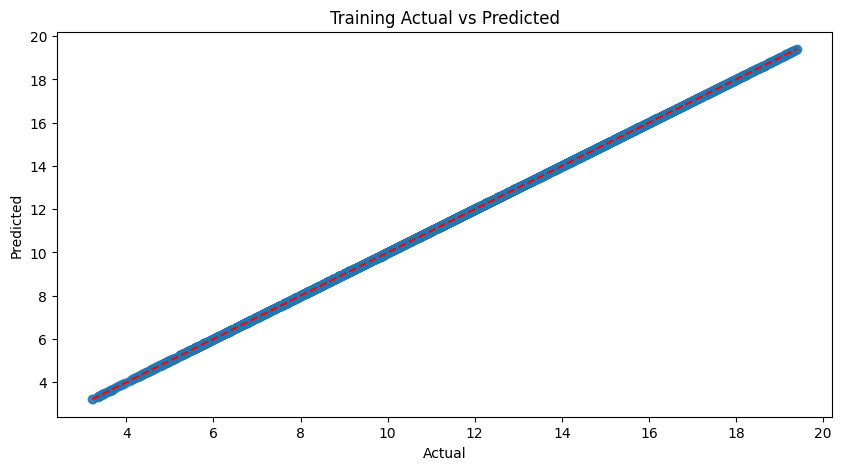

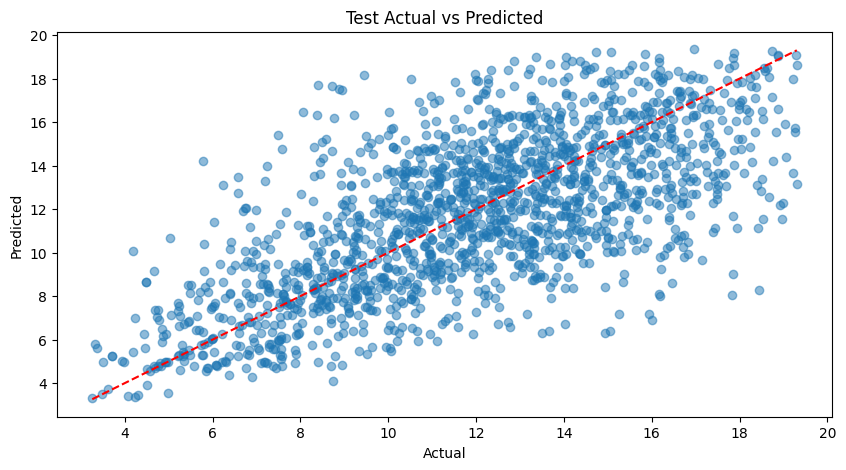

In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
with open('DT_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Prediction
y_train_pred = loaded_model.predict(X_train)
y_test_pred = loaded_model.predict(X_test)

# Metrics
def print_metrics(y_true, y_pred, dataset_type="Dataset"):
    print(f"{dataset_type} Performance Metrics:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.4f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"R-squared (R²): {r2_score(y_true, y_pred):.4f}")

print_metrics(y_train, y_train_pred, "Training")
print_metrics(y_test, y_test_pred, "Test")

# Visualizations
def plot_residuals(y_true, y_pred, dataset_type="Dataset"):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 5))
    sns.histplot(residuals, kde=True)
    plt.title(f'{dataset_type} Residuals Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

def plot_predictions(y_true, y_pred, dataset_type="Dataset"):
    plt.figure(figsize=(10, 5))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
    plt.title(f'{dataset_type} Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

plot_residuals(y_train, y_train_pred, "Training")
plot_residuals(y_test, y_test_pred, "Test")

plot_predictions(y_train, y_train_pred, "Training")
plot_predictions(y_test, y_test_pred, "Test")


Training Performance Metrics:
Mean Absolute Error (MAE): 0.3027
Mean Squared Error (MSE): 0.1611
Root Mean Squared Error (RMSE): 0.4014
R-squared (R²): 0.9866
Test Performance Metrics:
Mean Absolute Error (MAE): 1.7361
Mean Squared Error (MSE): 4.9259
Root Mean Squared Error (RMSE): 2.2194
R-squared (R²): 0.5876


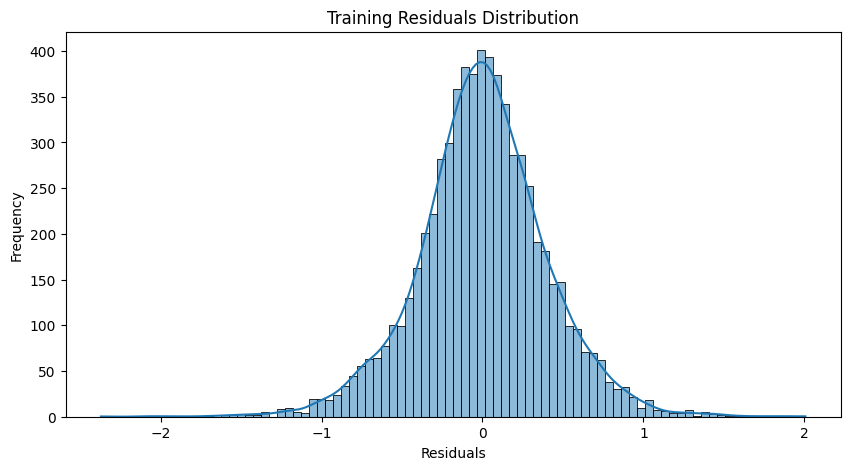

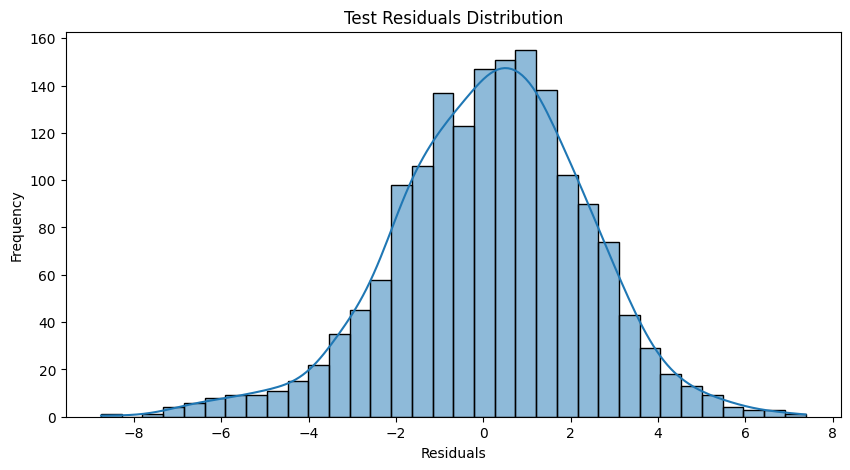

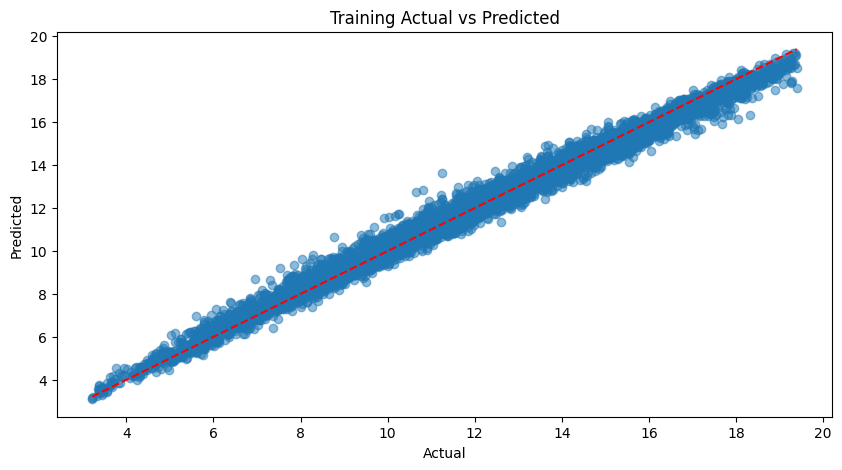

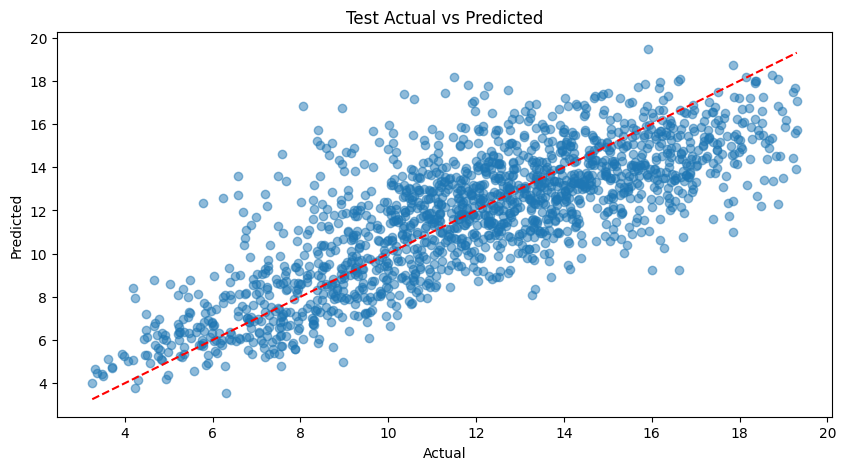

In [85]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
with open('XG_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Prediction
y_train_pred = loaded_model.predict(X_train)
y_test_pred = loaded_model.predict(X_test)

# Metrics
def print_metrics(y_true, y_pred, dataset_type="Dataset"):
    print(f"{dataset_type} Performance Metrics:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.4f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"R-squared (R²): {r2_score(y_true, y_pred):.4f}")

print_metrics(y_train, y_train_pred, "Training")
print_metrics(y_test, y_test_pred, "Test")
def plot_residuals(y_true, y_pred, dataset_type="Dataset"):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 5))
    sns.histplot(residuals, kde=True)
    plt.title(f'{dataset_type} Residuals Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

def plot_predictions(y_true, y_pred, dataset_type="Dataset"):
    plt.figure(figsize=(10, 5))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
    plt.title(f'{dataset_type} Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

plot_residuals(y_train, y_train_pred, "Training")
plot_residuals(y_test, y_test_pred, "Test")

plot_predictions(y_train, y_train_pred, "Training")
plot_predictions(y_test, y_test_pred, "Test")


In [86]:
import pickle

# Load the models from pickle files
with open('XG_model.pkl', 'rb') as file:
    xgb_model = pickle.load(file)

with open('DT_model.pkl', 'rb') as file:
    dt_model = pickle.load(file)


In [87]:
# Assuming you have X_test for predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)


In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R²: {r2_xgb}")

print(f"Decision Tree MAE: {mae_dt}")
print(f"Decision Tree RMSE: {rmse_dt}")
print(f"Decision Tree R²: {r2_dt}")


XGBoost MAE: 1.736067754262459
XGBoost RMSE: 2.2194313910678796
XGBoost R²: 0.5876200844372261
Decision Tree MAE: 2.2092188691881938
Decision Tree RMSE: 2.835317989888865
Decision Tree R²: 0.32699606470436726


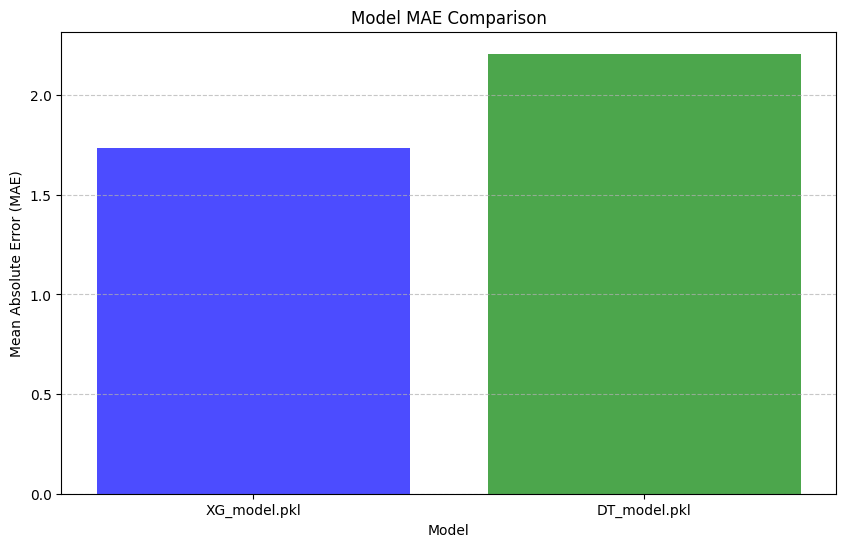

In [90]:
import matplotlib.pyplot as plt
mae_xgb = 1.7361
mae_dt = 2.2092

# Define the models and their MAE values
models = ['XG_model.pkl', 'DT_model.pkl']
mae_values = [mae_xgb, mae_dt]

plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color=['blue', 'green'], alpha=0.7)
plt.title('Model MAE Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
  # Adjust the y-axis limit based on MAE values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [93]:
import pickle

# Load the models
with open('XG_model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

with open('DT_model.pkl', 'rb') as f:
    dt_model = pickle.load(f)


In [94]:
import pandas as pd

# Example data
data = {
    'Item_Weight': [9.3],
    'Item_Fat_Content': [0],
    'Item_Visibility': [0.016047],
    'Item_Type': [0],
    'Item_MRP': [249.8092],
    'Outlet_Establishment_Year': [1999],
    'Outlet_Size': [0],
    'Outlet_Location_Type': [0],
    'Outlet_Type': [1]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Predict using the models
xgb_prediction = xgb_model.predict(df)[0]
dt_prediction = dt_model.predict(df)[0]


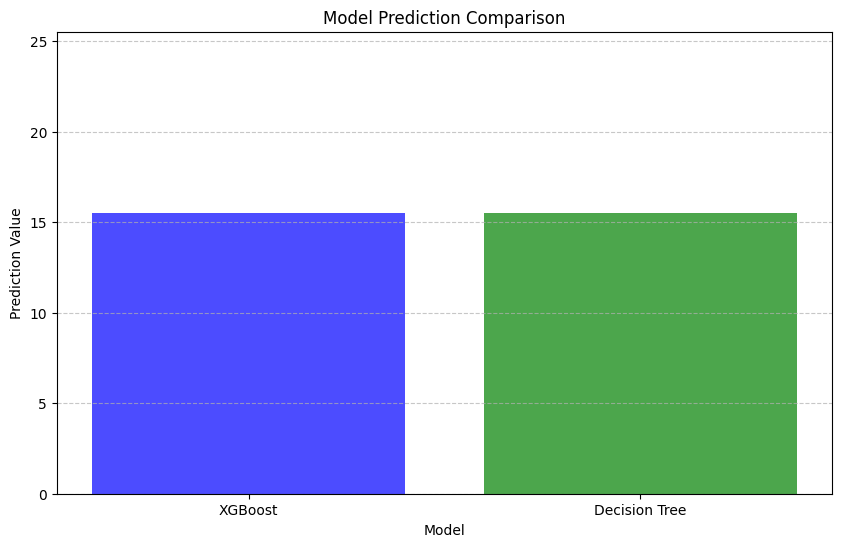

In [95]:
import matplotlib.pyplot as plt

# Predictions
predictions = [xgb_prediction, dt_prediction]
models = ['XGBoost', 'Decision Tree']

plt.figure(figsize=(10, 6))
plt.bar(models, predictions, color=['blue', 'green'], alpha=0.7)
plt.title('Model Prediction Comparison')
plt.xlabel('Model')
plt.ylabel('Prediction Value')
 # Adjust the y-axis limit based on prediction values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
